# Salary Dataset

## Column Description:

* Age, a numerical column
* Gender, a categorical column
* Education Level, a categorical column
* Job Title, a categorical column
* Years of Experience, a numerical column
* Salary, a numerical column

#### About Dataset:
This dataset is downloaded from Kaggle. It contains a company's data including  employee information such as age, gender, education level, years of experience and salary. It contains 6 columns and 6700 entries. This dataset is used to built an Machine Learning Pipeline.

### Import Libraries

In [ ]:
# To handle Data
import pandas as pd
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# Import iterative Imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# For Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, precision_score, mean_squared_error, r2_score

# For Classification\Regression Tasks
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, LeaveOneOut, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from scipy import stats

# Warnings
import warnings
warnings.filterwarnings('ignore')

: 

### Import Datasets

In [ ]:
# Import Dataset
p1 = pd.read_csv("C:\\Users\\ALICOM4\\OneDrive\\Desktop\\My Most Importent Folder\\Excel Data\\Salary_Data (Autosaved).csv")
p1

: 

## Assesing Data (EDA)

In [ ]:
p1.describe()

: 

In [ ]:
p1.info()

: 

In [ ]:
p1.head()

: 

In [ ]:
p1.tail()

: 

In [ ]:
p1.columns

: 

In [ ]:
p1.nunique()

: 

#### Explore Age Column:

In [ ]:
p1["Age"].nunique()

: 

In [ ]:
sns.histplot(p1["Age"], kde = True)
plt.axvline(p1["Age"].mean(), color="Red")
plt.axvline(p1["Age"].median(), color="Green")
plt.axvline(p1["Age"].mode()[0], color="Blue")

# Print 
print("Mean : ", p1["Age"].mean())
print("Median : ", p1["Age"].median())
print("Mode : ", p1["Age"].mode()[0])

: 

In [ ]:
sns.histplot(p1, x=p1["Age"],kde=1)

: 

In [ ]:
stats.shapiro(p1["Age"])

: 

In [ ]:
sns.boxplot(p1["Age"])

: 

In [ ]:
sns.barplot(data=p1, x ="Education Level", y="Age")
plt.figure(figsize=(10, 20))
plt.show()

: 

#### Explore Salary Column


In [ ]:
p1["Salary"].nunique()

: 

In [ ]:
sns.histplot(p1["Salary"], kde = True)
plt.axvline(p1["Salary"].mean(), color="Red")
plt.axvline(p1["Salary"].median(), color="Green")
plt.axvline(p1["Salary"].mode()[0], color="Blue")

# Print 
print("Mean : ", p1["Salary"].mean())
print("Median : ", p1["Salary"].median())
print("Mode : ", p1["Salary"].mode()[0])

: 

In [ ]:
stats.shapiro(p1["Salary"])

: 

In [ ]:
sns.boxplot(p1["Salary"])

: 

In [ ]:
sns.barplot(data=p1, x ="Education Level", y="Salary")
plt.figure(figsize=(10, 20))
plt.show()

: 

#### Explore Years of Experience Column

In [ ]:
p1["Years of Experience"].unique()

: 

In [ ]:
sns.histplot(p1, x=p1["Years of Experience"],kde=1)

: 

In [ ]:
stats.shapiro(p1["Years of Experience"])

: 

In [ ]:
sns.boxplot(p1["Years of Experience"])

: 

In [ ]:
sns.barplot(data=p1, x ="Education Level", y="Years of Experience")
plt.figure(figsize=(10, 20))
plt.show()

: 

#### Explore Gender & Education Level Column

In [ ]:
p1["Gender"].unique()

: 

In [ ]:
p1.groupby('Gender')['Education Level'].value_counts()

: 

In [ ]:
def standardize_education_level(edu_level: str) -> str:
    edu_lower = edu_level.lower()  # Convert to lowercase for case-insensitive comparison
    if edu_lower in ["bachelor's", "bachelor's degree"]:
        return "Bachelor's"
    elif edu_lower in ["master's", "master's degree"]:
        return "Master's"
    elif "phd" in edu_lower:  # Check if "phd" appears in the string
        return "PhD"
    else:
        return edu_level  # Return the original value if it doesn't match any of the specified categories

p1['Education Level'] = p1['Education Level'].astype(str)  # Convert the values to strings

p1['Education Level'] = p1['Education Level'].apply(standardize_education_level)

print("Updated p1 DataFrame:")
print(p1)


: 

In [ ]:
def standardize_education_level(edu_level: str) -> str:
    if edu_level.lower() in ["bachelor's", "bachelor's degree"]:
        return "Bachelor's"
    elif edu_level.lower() in ["master's", "master's degree"]:
        return "Master's"
    elif edu_level.lower() in ["phD", "PhD"]:
        return "PhD"
    else:
        return edu_level  # Return the original value if it doesn't match any of the specified categories

p1['Education Level'] = p1['Education Level'].astype(str)  # Convert the values to strings

p1['Education Level'] = p1['Education Level'].apply(standardize_education_level)

print("Updated p1 DataFrame:")
print(p1)

: 

In [ ]:
p1.groupby('Gender')['Education Level'].value_counts()

: 

In [ ]:
table = pd.pivot_table(p1, values="Years of Experience", index="Gender", columns = "Education Level", aggfunc=np.sum )
table

: 

### Composition of the whole Dataset

In [ ]:
sns.swarmplot(data=p1, x="Gender", y="Age",hue="Education Level")

: 

In [ ]:
sns.swarmplot(data=p1, x="Gender", y="Salary",hue="Education Level")

: 

In [ ]:
sns.swarmplot(data=p1, x="Gender", y="Years of Experience",hue="Education Level")

: 

## Cleaning Data

In [ ]:
p1.isnull().sum() / len(p1) * 100

Age                    0.044756
Gender                 0.044756
Education Level        0.000000
Job Title              0.044756
Years of Experience    0.059675
Salary                 0.089512
dtype: float64

In [ ]:
p1.drop(columns=['Job Title'], inplace = True)

#### Imputation

In [ ]:
df= pd.DataFrame({'Gender': ['Male', 'Female', 'Male', 'Female', 'Other' ]})

# Replace 'Male' with 0 and 'Female' with 1 in the 'Gender' column of 'p1'
p1['Gender'] = p1['Gender'].replace({'Male': 0, 'Female': 1,'Other': 2})

# Print the updated DataFrame to check
print(p1)

       Age  Gender Education Level  Years of Experience    Salary
0     32.0     0.0      Bachelor's                  5.0       NaN
1     28.0     1.0        Master's                  3.0   65000.0
2     45.0     NaN             PhD                  NaN  150000.0
3     36.0     NaN      Bachelor's                  7.0   60000.0
4     52.0     0.0        Master's                  8.0  200000.0
...    ...     ...             ...                  ...       ...
6698  49.0     1.0             PhD                 20.0  200000.0
6699  32.0     0.0     High School                  3.0   50000.0
6700  30.0     1.0      Bachelor's                  4.0   55000.0
6701  46.0     0.0        Master's                 14.0  140000.0
6702  26.0     1.0     High School                  1.0   35000.0

[6703 rows x 5 columns]


In [ ]:
df = pd.DataFrame({'Education Level': ["Bachelor's", "Master's", "PhD", 'High School']})

# Replace educational levels with numerical values in the 'Educational Level' column of 'p1'
p1['Education Level'] = p1['Education Level'].replace({"Bachelor's": 0, "Master's": 1, "PhD": 2, 'High School': 3})

# Print the updated DataFrame to check
print(p1)

       Age  Gender Education Level  Years of Experience    Salary
0     32.0     0.0               0                  5.0       NaN
1     28.0     1.0               1                  3.0   65000.0
2     45.0     NaN               2                  NaN  150000.0
3     36.0     NaN               0                  7.0   60000.0
4     52.0     0.0               1                  8.0  200000.0
...    ...     ...             ...                  ...       ...
6698  49.0     1.0               2                 20.0  200000.0
6699  32.0     0.0               3                  3.0   50000.0
6700  30.0     1.0               0                  4.0   55000.0
6701  46.0     0.0               1                 14.0  140000.0
6702  26.0     1.0               3                  1.0   35000.0

[6703 rows x 5 columns]


In [ ]:
p1.isnull().sum()

Age                    3
Gender                 3
Education Level        0
Years of Experience    4
Salary                 6
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
#p1 = p1.copy()

# Remove missing values from the imputation
imputer = KNNImputer(n_neighbors=5)
p1[['Age', 'Gender', 'Education Level', 'Years of Experience',  'Salary']] = imputer.fit_transform(p1)

In [ ]:
p1.isnull().sum() / len(p1) * 100

Age                    0.0
Gender                 0.0
Education Level        0.0
Years of Experience    0.0
Salary                 0.0
dtype: float64

In [ ]:
p1['Education Level'].unique()

array([0.        , 1.        , 2.        , 0.8       , 0.88686567,
       1.2       , 3.        ])

#### Outlier Removal of Age Column

<Axes: ylabel='Age'>

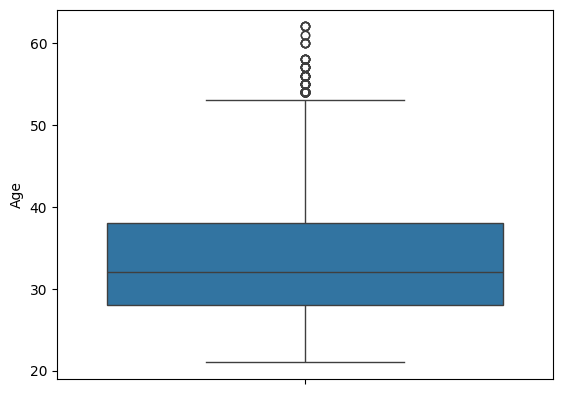

In [ ]:
# Ouliers removal
sns.boxplot(p1["Age"])

In [ ]:
Q1 = p1["Age"].quantile(0.25) 
Q3 = p1["Age"].quantile(0.75) 
IQR = Q3 - Q1
IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
p1= p1[(p1["Age"] > lower_bound) & (p1["Age"] < upper_bound)] ## Means that the data which have to be taken is is between max and min line

<Axes: ylabel='Age'>

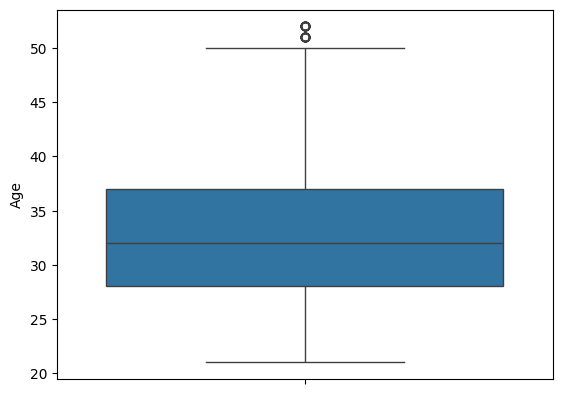

In [ ]:
sns.boxplot(p1["Age"])

#### Outlier Removal of Years of Experience Column

<Axes: ylabel='Years of Experience'>

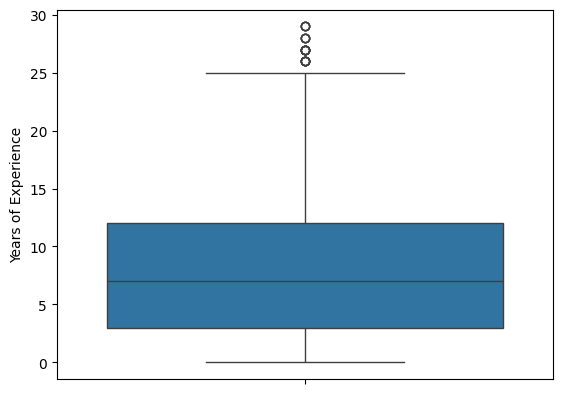

In [ ]:
sns.boxplot(p1["Years of Experience"])

In [ ]:
Q1 = p1["Years of Experience"].quantile(0.25) 
Q3 = p1["Years of Experience"].quantile(0.75) 
IQR = Q3 - Q1
IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
p1= p1[(p1["Years of Experience"] > lower_bound) & (p1["Years of Experience"] < upper_bound)] ## Means that the data which have to be taken is is between max and min line

#### Checking the Outliers in Salary Column

<Axes: ylabel='Salary'>

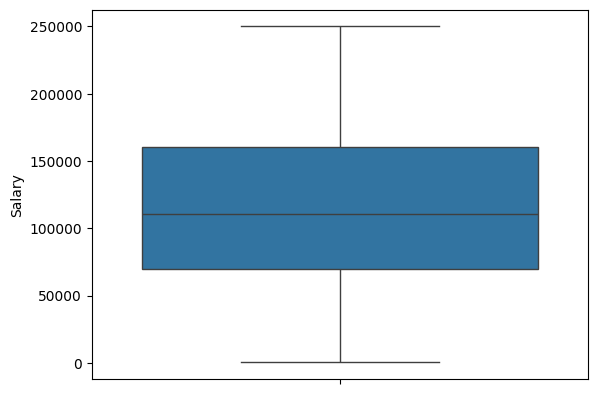

In [ ]:
sns.boxplot(p1["Salary"])

#### Data Dispersion of Numerical columns(Age, Salary, Years of Experience)

<Axes: xlabel='Age', ylabel='Count'>

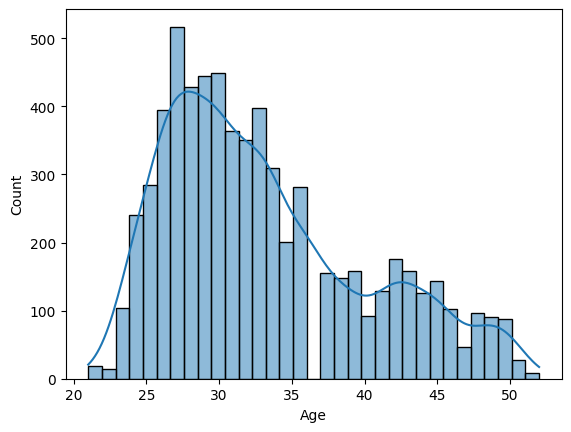

In [ ]:
sns.histplot(p1["Age"],kde=1)

<Axes: xlabel='Salary', ylabel='Count'>

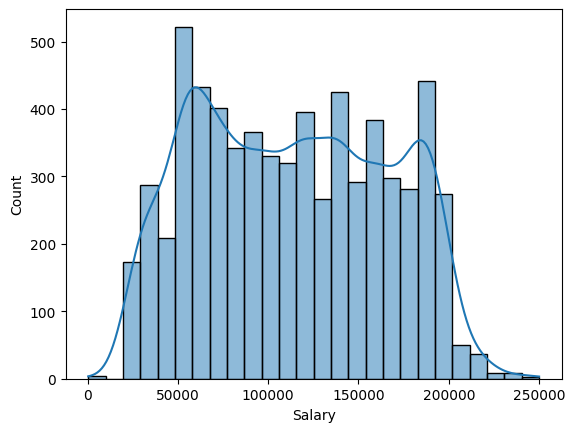

In [ ]:
sns.histplot(p1["Salary"],kde=1)

<Axes: xlabel='Years of Experience', ylabel='Count'>

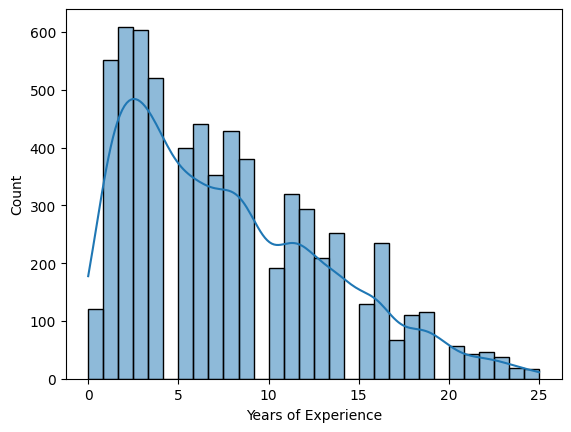

In [ ]:
sns.histplot(p1["Years of Experience"],kde=1)

In [ ]:
p1.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Years of Experience    0
Salary                 0
dtype: int64

In [ ]:
p1.head()

,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,0.0,0.0,5.0,101000.0
1,28.0,1.0,1.0,3.0,65000.0
2,45.0,0.4,2.0,15.4,150000.0
3,36.0,0.4,0.0,7.0,60000.0
4,52.0,0.0,1.0,8.0,200000.0


In [ ]:
p1.head()

,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,0.0,0.0,5.0,101000.0
1,28.0,1.0,1.0,3.0,65000.0
2,45.0,0.4,2.0,15.4,150000.0
3,36.0,0.4,0.0,7.0,60000.0
4,52.0,0.0,1.0,8.0,200000.0


In [ ]:
p1.head()

,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,0.0,0.0,5.0,101000.0
1,28.0,1.0,1.0,3.0,65000.0
2,45.0,0.4,2.0,15.4,150000.0
3,36.0,0.4,0.0,7.0,60000.0
4,52.0,0.0,1.0,8.0,200000.0


## Statistcal Analysis

\\ Null Hypothesis: Data is Normal

\\ Alternate Hypothesis: Data is not Normal

### Transforming Data

p-value: 4.114279404139858e-47. Sample does not look Gaussian/Normally distributed (Reject H0)
p-value: 1.5641723580602617e-47. Sample does not look Gaussian/Normally distributed (Reject H0)
p-value: 2.0415681490294697e-38. Sample does not look Gaussian/Normally distributed (Reject H0)


,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,0.0,0.0,5.0,101000.0
1,28.0,1.0,1.0,3.0,65000.0
2,45.0,0.4,2.0,15.4,150000.0
3,36.0,0.4,0.0,7.0,60000.0
4,52.0,0.0,1.0,8.0,200000.0


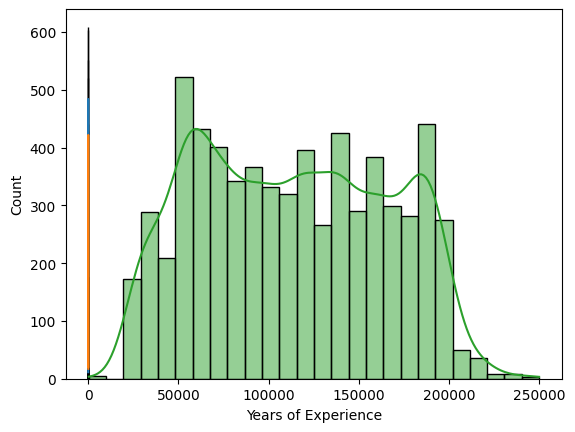

In [ ]:
sns.histplot(p1["Years of Experience"], kde=1)

sns.histplot(p1["Age"], kde=1)

sns.histplot(p1["Salary"], kde=1)

# Perform Shapiro-Wilk test for normality
statistic, p = stats.shapiro(p1["Age"])

# Print the results
if p > 0.05:
    print(f'p-value: {p}. Sample looks Gaussian/Normally distributed (Could not Reject H0)')
else:
    print(f'p-value: {p}. Sample does not look Gaussian/Normally distributed (Reject H0)')

# Perform Shapiro-Wilk test for normality
statistic, p = stats.shapiro(p1["Years of Experience"])

# Print the results
if p > 0.05:
    print(f'p-value: {p}. Sample looks Gaussian/Normally distributed (Could not Reject H0)')
else:
    print(f'p-value: {p}. Sample does not look Gaussian/Normally distributed (Reject H0)')

# Perform Shapiro-Wilk test for normality
statistic, p = stats.shapiro(p1["Salary"])

# Print the results
if p > 0.05:
    print(f'p-value: {p}. Sample looks Gaussian/Normally distributed (Could not Reject H0)')
else:
    print(f'p-value: {p}. Sample does not look Gaussian/Normally distributed (Reject H0)')
p1.head()

In [ ]:
x= p1[['Age']]
y= p1[['Years of Experience']]
z= p1[['Salary']]

In [ ]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

qt_normal = QuantileTransformer(output_distribution='normal')

# Apply Quantile transformation
p1['Quantile_X'] = qt_normal.fit_transform(x.values.reshape(-1, 1))
p1['Quantile_Y'] = qt_normal.fit_transform(y.values.reshape(-1, 1))
p1['Quantile_Z'] = qt_normal.fit_transform(z.values.reshape(-1, 1))

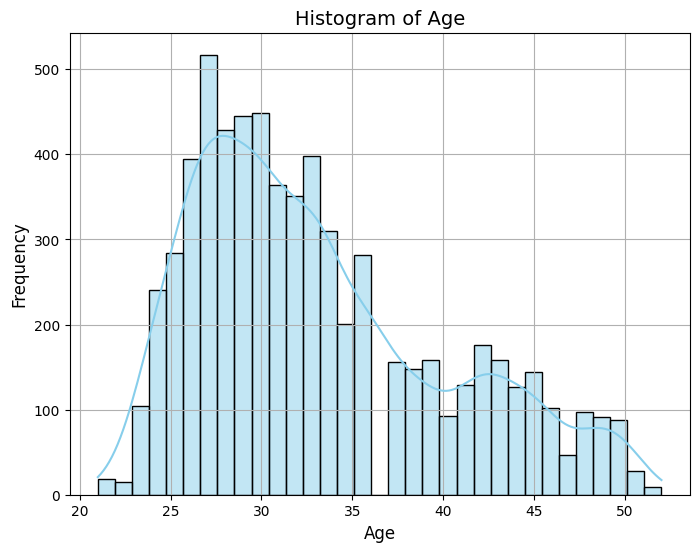

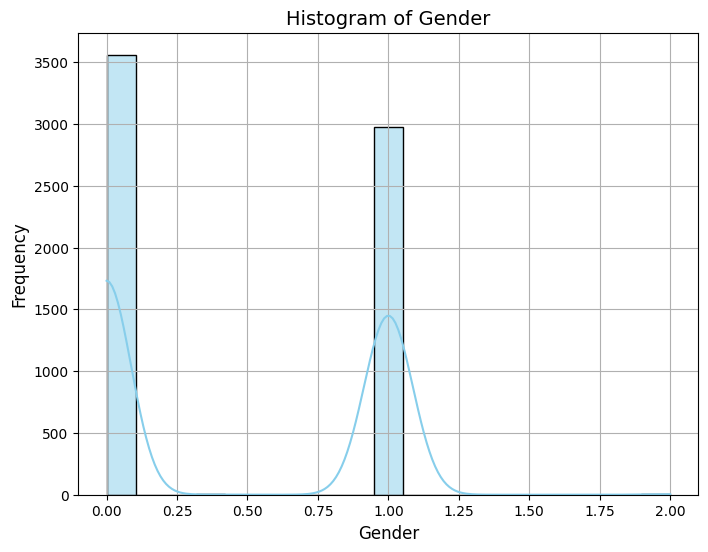

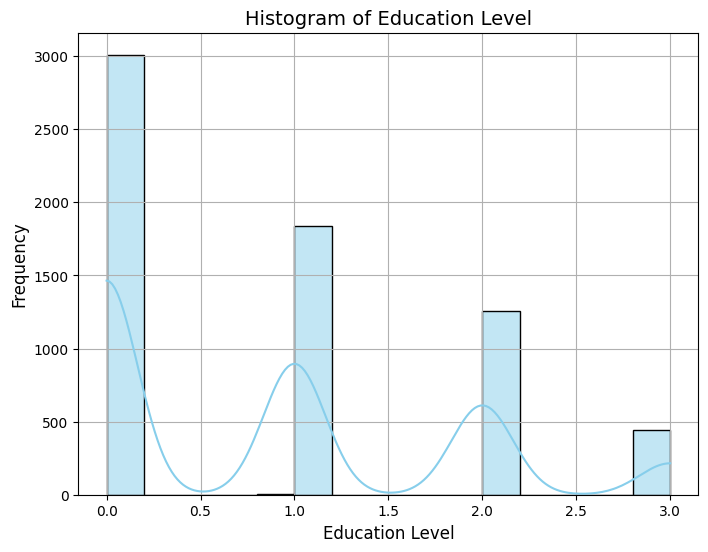

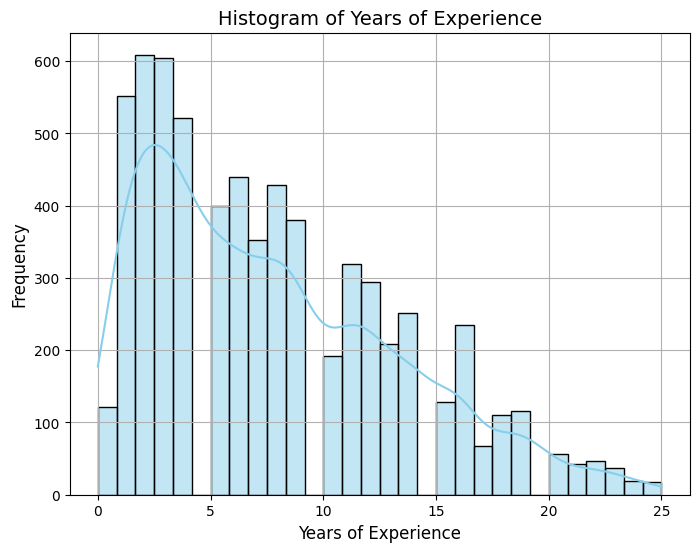

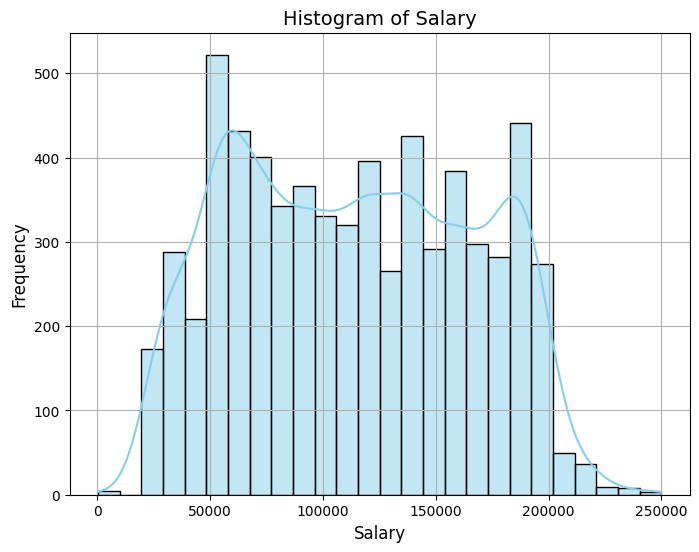

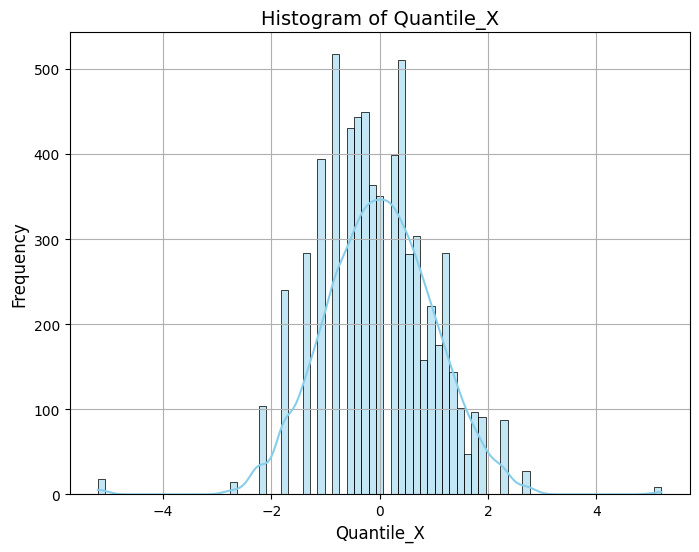

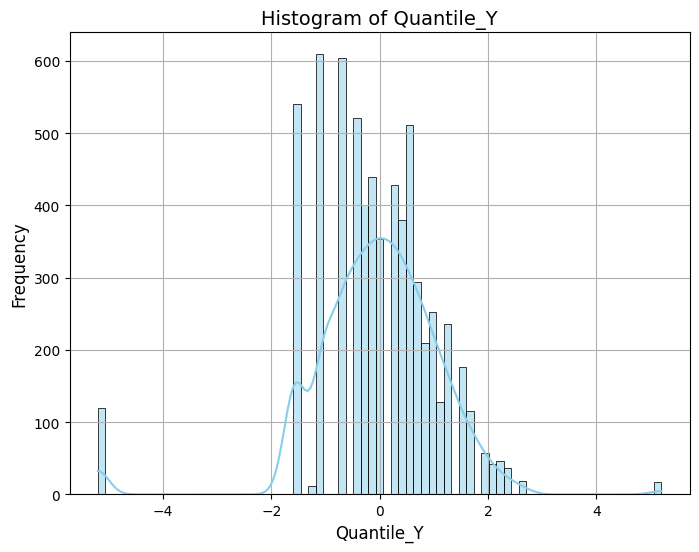

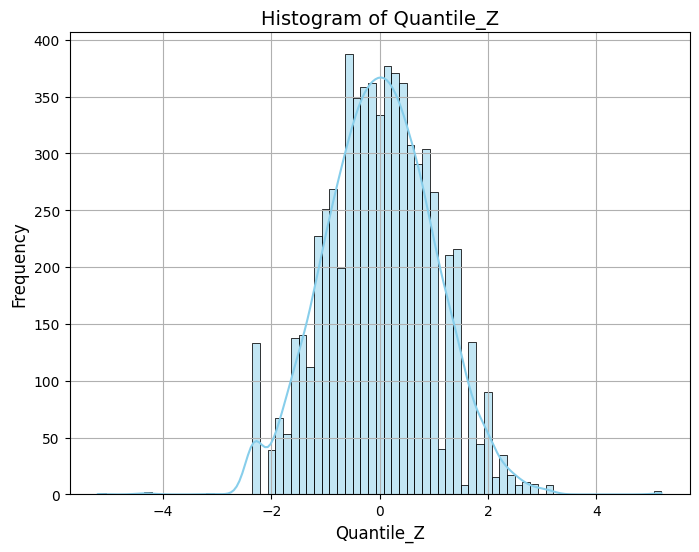

In [ ]:

for column in p1.columns:
    # Create a new figure for each column
    plt.figure(figsize=(8, 6))
    
    # Draw histogram plot with KDE for the column using seaborn's distplot
    sns.histplot(p1[column], kde=True, color='skyblue', edgecolor='black')
    
    # Set title and labels
    plt.title(f'Histogram of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    # Show grid
    plt.grid(True)
    
    # Show plot
    plt.show()

#### Levene Test

\\ Null Hypothesis: Data is Homoginous


\\ Alternate Hypothesis: Data is not Homoginous

In [ ]:
import scipy.stats as stats
import pandas as pd

# Assuming you have already loaded your data into the p1 DataFrame

# Extract 'Age' and 'Fare' columns from the p1 DataFrame
age_column = p1['Age']
experience_column = p1['Years of Experience']
salary_column = p1['Salary']



# Perform Levene Test
w_stat, p_val = stats.levene(age_column, experience_column, salary_column)

print("w_statistic:", w_stat)
print("p-value:", p_val)

if p_val < 0.05:  # Assuming alpha level of 0.05
    print(f"Variances are equal: Fail to Reject the null hypothesis")
else:
    print(f"Variances are not equal: Reject the null hypothesis")

w_statistic: 19160.47538134925
p-value: 0.0
Variances are equal: Fail to Reject the null hypothesis


### Chi-Squared Test

In [ ]:
contigency_table = pd.crosstab(p1["Gender"], p1["Education Level"])
contigency_table

Education Level,0.000000,0.800000,0.886866,1.000000,1.200000,2.000000,3.000000
Gender,,,,,,,
0.000000,1812,0,0,774,1,788,185
0.400000,1,0,0,0,0,1,0
0.453881,0,0,1,0,0,0,0
1.000000,1197,1,0,1063,0,467,251
2.000000,0,0,0,2,0,0,6


In [ ]:
chi2, p, dof, expected = stats.chi2_contingency(contigency_table)

# Print
print("Chi_Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected:", expected)

Chi_Square Statistic: 6827.4199004438415
p-value: 0.0
Degrees of Freedom: 24
Expected: [[1.63596947e+03 5.43511450e-01 5.43511450e-01 9.99517557e+02
  5.43511450e-01 6.82650382e+02 2.40232061e+02]
 [9.19083969e-01 3.05343511e-04 3.05343511e-04 5.61526718e-01
  3.05343511e-04 3.83511450e-01 1.34961832e-01]
 [4.59541985e-01 1.52671756e-04 1.52671756e-04 2.80763359e-01
  1.52671756e-04 1.91755725e-01 6.74809160e-02]
 [1.36897557e+03 4.54809160e-01 4.54809160e-01 8.36394046e+02
  4.54809160e-01 5.71240305e+02 2.01025649e+02]
 [3.67633588e+00 1.22137405e-03 1.22137405e-03 2.24610687e+00
  1.22137405e-03 1.53404580e+00 5.39847328e-01]]


### Wilcoxon(Paired Sampling)

In [ ]:

from scipy.stats import wilcoxon

# Extract the columns from the p1 DataFrame
age_column = p1['Age']
experience_column = p1['Years of Experience']
salary_column = p1['Salary']

# Perform Wilcoxon signed-rank test between 'Age' and 'Years of Experience'
statistic_1, p_val_1 = wilcoxon(age_column, experience_column)
print("Test statistic between Age and Years of Experience:", statistic_1)
print("p-value between Age and Years of Experience:", p_val_1)

# Perform Wilcoxon signed-rank test between 'Age' and 'Salary'
statistic_2, p_val_2 = wilcoxon(age_column, salary_column)
print("\nTest statistic between Age and Salary:", statistic_2)
print("p-value between Age and Salary:", p_val_2)

# Perform Wilcoxon signed-rank test between 'Years of Experience' and 'Salary'
statistic_3, p_val_3 = wilcoxon(experience_column, salary_column)
print("\nTest statistic between Years of Experience and Salary:", statistic_3)
print("p-value between Years of Experience and Salary:", p_val_3)

alpha = 0.05  # Significance level

if any(p_val < alpha for p_val in [p_val_1, p_val_2, p_val_3]):
    print("\nThere is a significant difference between at least one pair of the Age, Years of Experience, and Salary columns.")
else:
    print("\nThere is no significant difference between any pair of the Age, Years of Experience, and Salary columns.")


Test statistic between Age and Years of Experience: 0.0
p-value between Age and Years of Experience: 0.0

Test statistic between Age and Salary: 0.0
p-value between Age and Salary: 0.0

Test statistic between Years of Experience and Salary: 0.0
p-value between Years of Experience and Salary: 0.0

There is a significant difference between at least one pair of the Age, Years of Experience, and Salary columns.


### Spearman's Correlation Coefficient

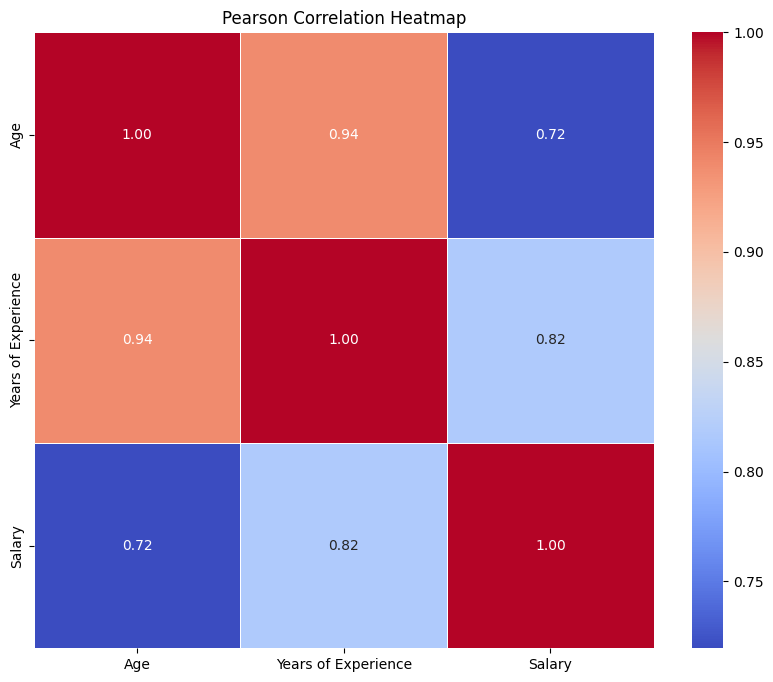

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns
selected_columns = ["Age", "Years of Experience", "Salary"]
selected_df = p1[selected_columns]

# Calculate the Pearson correlation coefficient
correlation_matrix = selected_df.corr(method='pearson')

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation Heatmap')
plt.show()

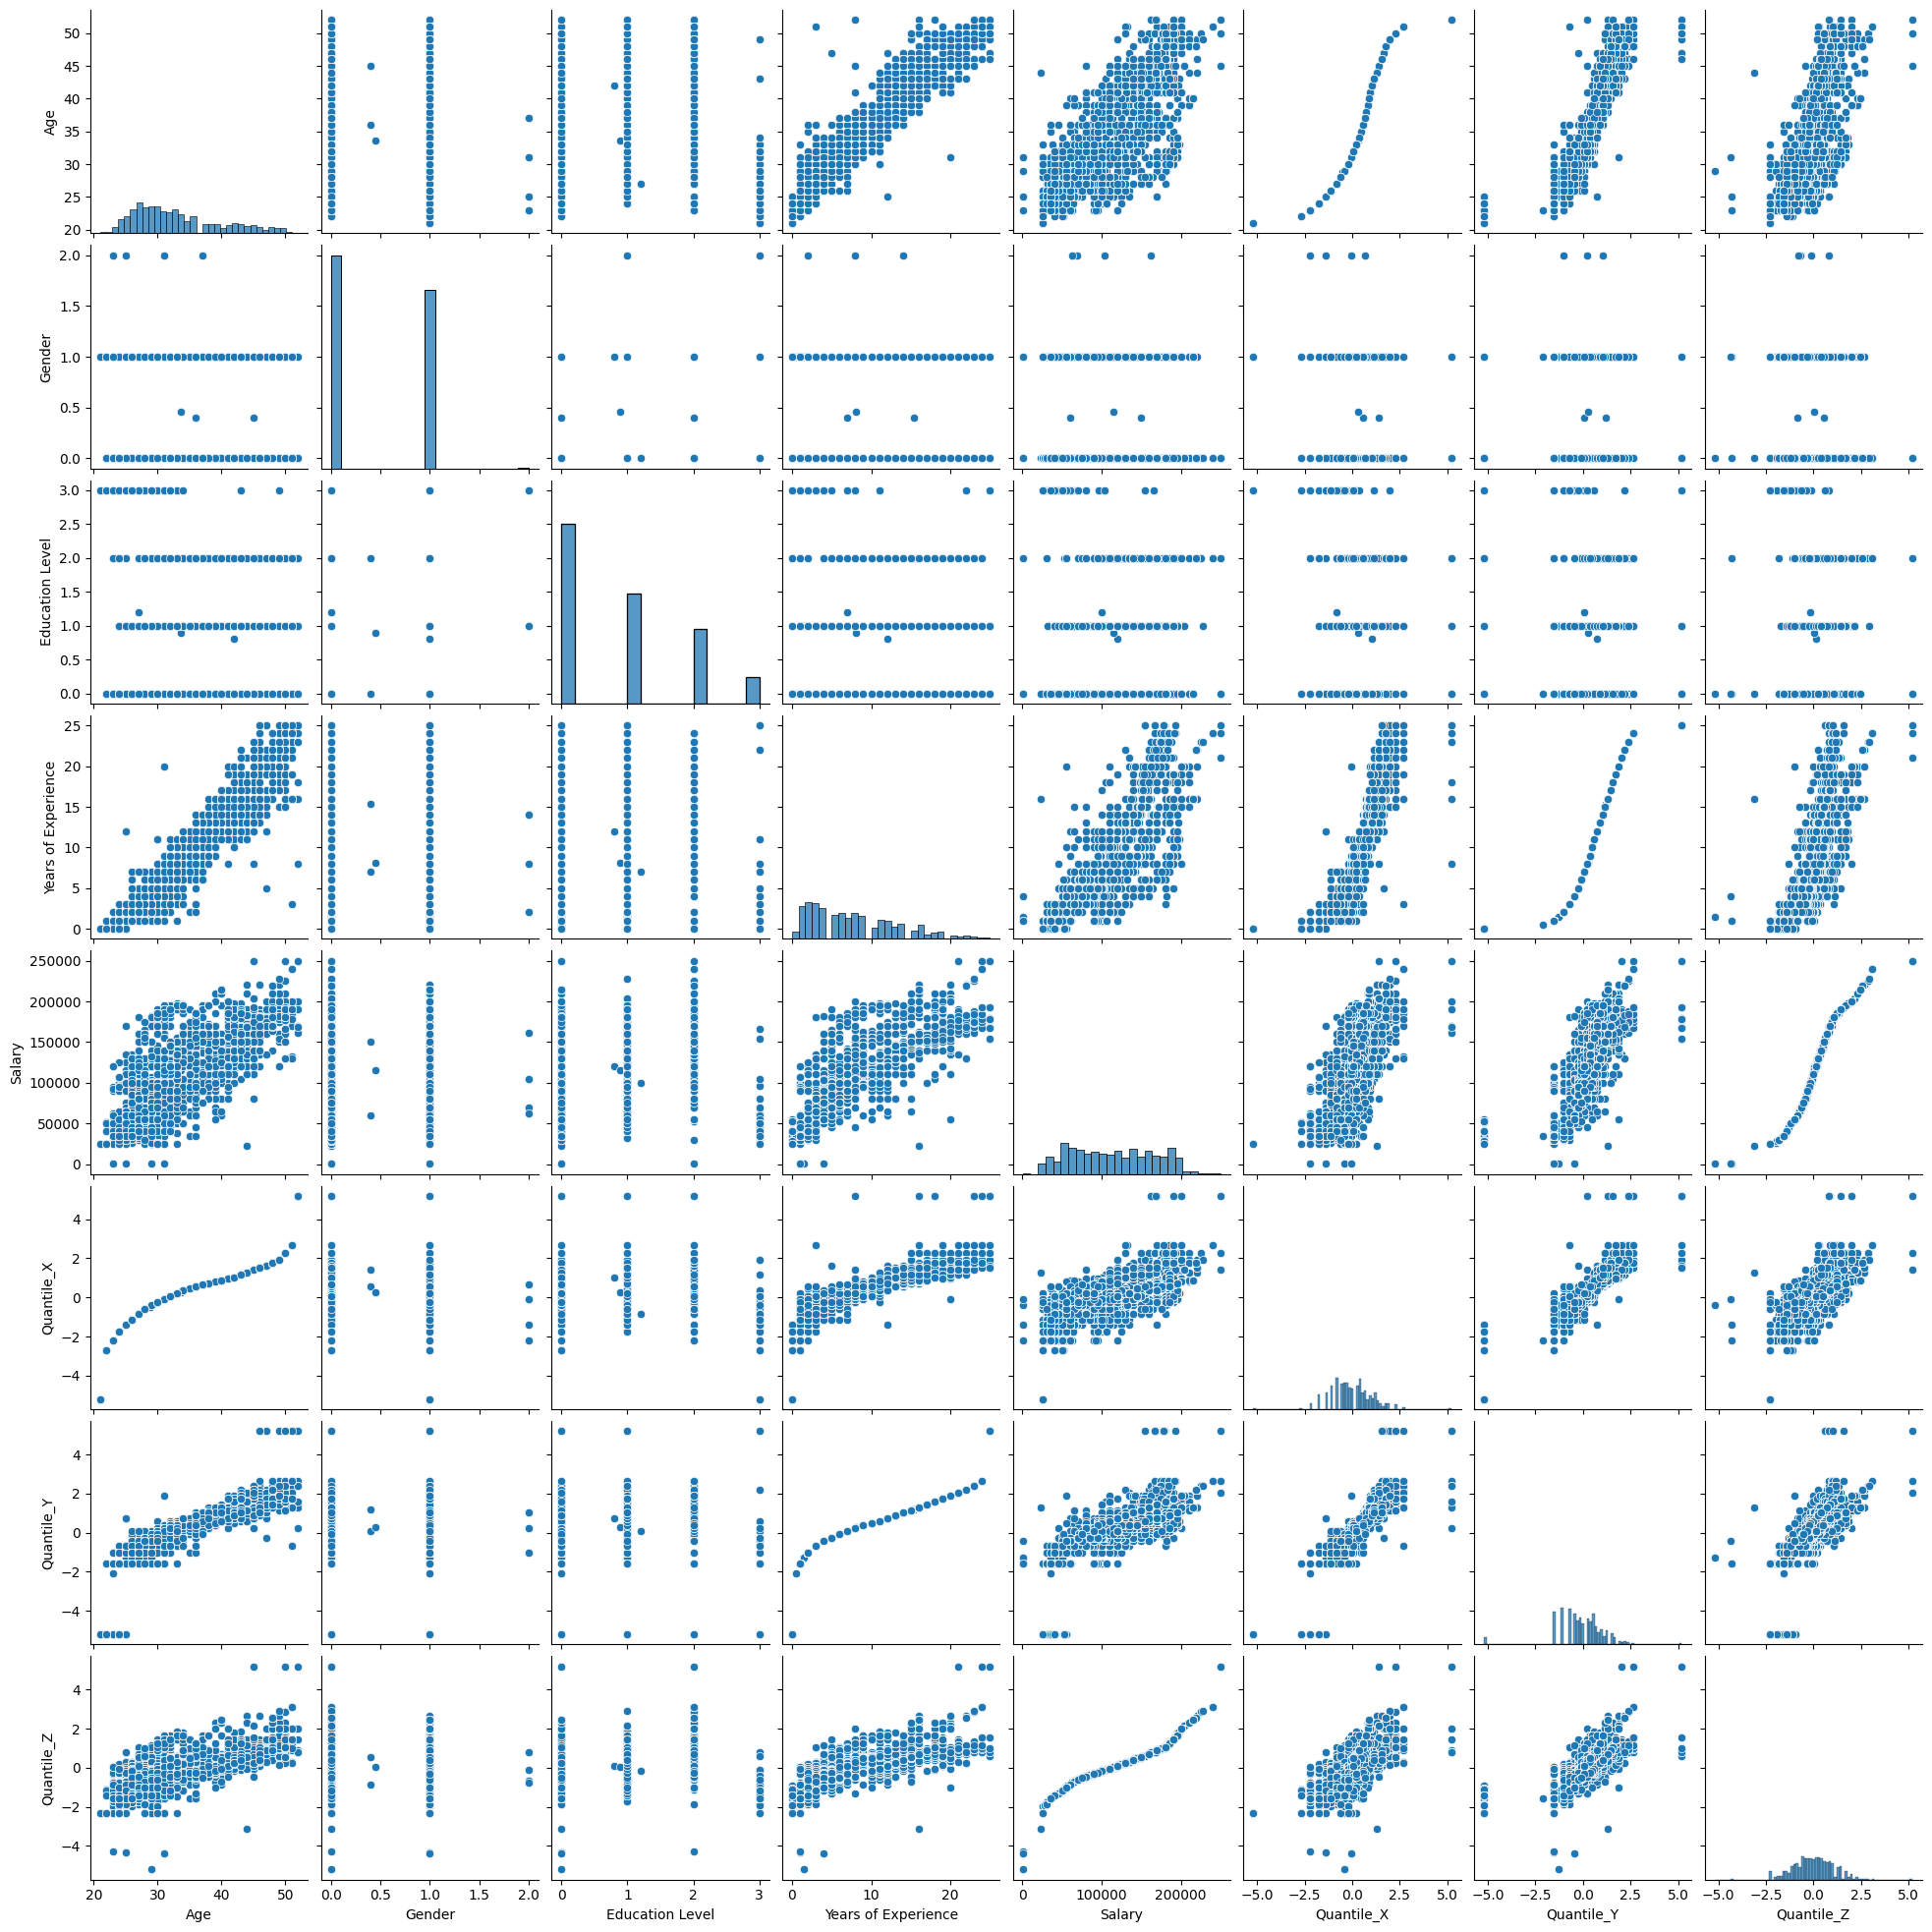

In [ ]:
sns.pairplot(p1)

## Machine Learning

### Model Building

In [ ]:
p1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6550 entries, 0 to 6702
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6550 non-null   float64
 1   Gender               6550 non-null   float64
 2   Education Level      6550 non-null   float64
 3   Years of Experience  6550 non-null   float64
 4   Salary               6550 non-null   float64
 5   Quantile_X           6550 non-null   float64
 6   Quantile_Y           6550 non-null   float64
 7   Quantile_Z           6550 non-null   float64
dtypes: float64(8)
memory usage: 460.5 KB


#### Feature and Label Selection

In [ ]:
x= p1[['Age', 'Years of Experience']]
y= p1['Salary']

#### Split Data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8 ,test_size=0.2)

#### Best Model Selection on the Basis of "Hyperparameter  Tuning","Cross-Validation" and Evaluation Metrics

In [ ]:

### Hyperparameter  Tuning
models = {
            'Linear Regression' : (LinearRegression(), {}),
            'Decision Tree Regressor' : (DecisionTreeRegressor(), {'max_depth' : [None, 5, 10]}),
            'SVR' : (SVR(), {'kernel' :  ['rbf', 'poly', 'sigmoid']}),
            'Random Forest Regressor' : (RandomForestRegressor(), {'n_estimators' : [10, 100]}),
            'KNeighborsRegressor' : (KNeighborsRegressor(), {'n_neighbors' : np.arange(3, 100, 2)}),
            'GradientBoostingRegressor' : (GradientBoostingRegressor(), {'n_estimators' : [10, 100]}),
            'XGBRegressor' : (XGBRegressor(), {'n_estimators' : [10, 100]})
}

best_model_name = None
best_score = float('inf')  # Initialize with a high value for MSE and MAE
best_r2 = -float('inf')  # Initialize with a low value for R2

### Cross-Validation
for name, (model, params) in models.items():
    # Create a Pipeline
    pipeline = GridSearchCV(model, params, cv=5)
    
    # Fit x_train and y_train in the model 
    pipeline.fit(x_train, y_train)
    
    # Get the best parameters and the best estimator (model)
    best_params = pipeline.best_params_
    best_model = pipeline.best_estimator_
    
    # Make prediction from the best model
    y_pred = best_model.predict(x_test)
    
### Evaluation Metrics    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
### Print Best Model Selection     
    print(name, 'Best Parameters:', best_params)
    print(name, 'MSE: ', mse)
    print(name, 'R2: ', r2)
    print(name, 'MAE: ', mae)
    print('--------------------------------------------------')
    
    # Update the best model based on performance metrics
    if mse + mae < best_score:  # Lower MSE and MAE are better
        best_score = mse + mae
        best_model_name = name
        best_r2 = r2
    elif mse + mae == best_score and r2 > best_r2:  # If there's a tie, higher R2 is better
        best_model_name = name
        best_r2 = r2

print("Best Model  : : : : : : : :", best_model_name)


Linear Regression Best Parameters: {}
Linear Regression MSE:  818660502.5687166
Linear Regression R2:  0.6881168211465658
Linear Regression MAE:  22699.445225197982
--------------------------------------------------
Decision Tree Regressor Best Parameters: {'max_depth': None}
Decision Tree Regressor MSE:  451101429.9014881
Decision Tree Regressor R2:  0.8281449422543792
Decision Tree Regressor MAE:  15255.749140603932
--------------------------------------------------
SVR Best Parameters: {'kernel': 'poly'}
SVR MSE:  1415037657.3233373
SVR R2:  0.4609164099421361
SVR MAE:  30651.49899285828
--------------------------------------------------
Random Forest Regressor Best Parameters: {'n_estimators': 100}
Random Forest Regressor MSE:  449427944.90753835
Random Forest Regressor R2:  0.8287824859224063
Random Forest Regressor MAE:  15311.121292596123
--------------------------------------------------
KNeighborsRegressor Best Parameters: {'n_neighbors': 21}
KNeighborsRegressor MSE:  46453360